<a href="https://colab.research.google.com/github/adilababayeva13/Brain_tumor_detection/blob/main/Babayeva_Adila_604_20E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES 📚


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten


# Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


#EXPLORATORY DATA ANALYSIS (EDA) 🌳


##DATA INSPECTION ⚓

In [ ]:
df = pd.read_csv('./weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
info = pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
info.rename (columns={'index': 'col_name',0: 'null_count'}, inplace=True)
info['null_percentage'] = info.null_count/df.shape[0] * 100
info

,col_name,null_count,null_percentage
0,Date,0,0.000000
1,RISK_MM,0,0.000000
2,RainTomorrow,0,0.000000
3,Location,0,0.000000
4,MaxTemp,322,0.226453
5,MinTemp,637,0.447983
6,Temp9am,904,0.635756
7,WindSpeed9am,1348,0.948007
8,Rainfall,1406,0.988797
9,RainToday,1406,0.988797


In [ ]:
col_names = df.columns
# Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM cols are not necessary to see uniqueness
col_names = col_names.drop(df.columns[[0, 2,3,4,5,6,8,11,12,13,14,15,16,17,18,19,20,22,]])
for column in col_names:
    print(column,' : ',df[column].unique(), '\n')

Location  :  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

WindGustDir  :  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW'] 

WindDir9am  :  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 

WindDir3pm  :  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE'] 

RainToday  :  ['No' 'Yes' nan] 

RainTomorrow  :  ['No' 'Yes'] 



Problems in the data set

- All columns have null values ​​except date and location.

- Cloud3pm,Cloud9am,Evaporation,Sunshine columns' null percentage is very high.

- There is no need for RISK_MM column, because our teacher said like that.



##DATA CLEANING 🍀

In [ ]:
columns_to_delete = ['RISK_MM']
df = df.drop(columns=columns_to_delete)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


## Date column ⏳



### Spliting date column into 3 categories :  month , year and season. I think day is not necessary to predict weather. (seasons is written according to Australia)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month - 1

def get_season_australia(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:  # 9, 10, 11
        return 'Spring'

df['Season'] = df['Month'].apply(get_season_australia)
df = df.drop('Date', axis=1)
df[['Year', 'Month', 'Season']].head() # Display the new columns for verification

,Year,Month,Season
0,2008,11,Spring
1,2008,11,Spring
2,2008,11,Spring
3,2008,11,Spring
4,2008,11,Spring


### Distribution of date

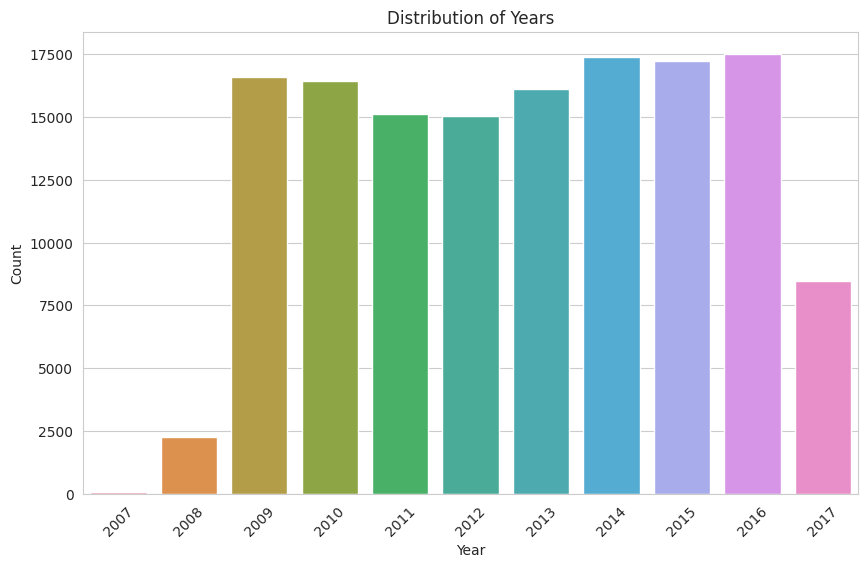

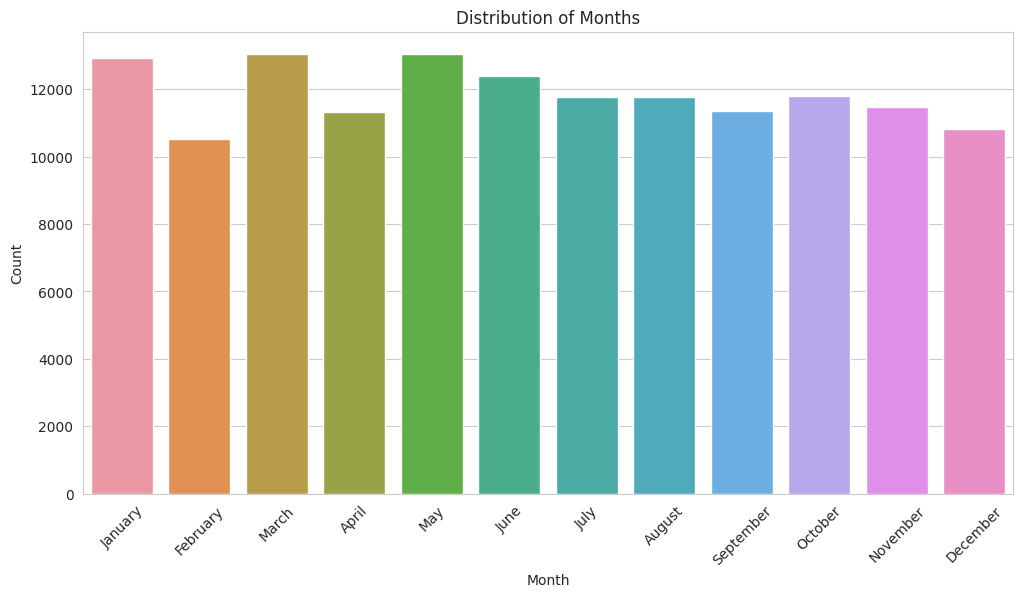

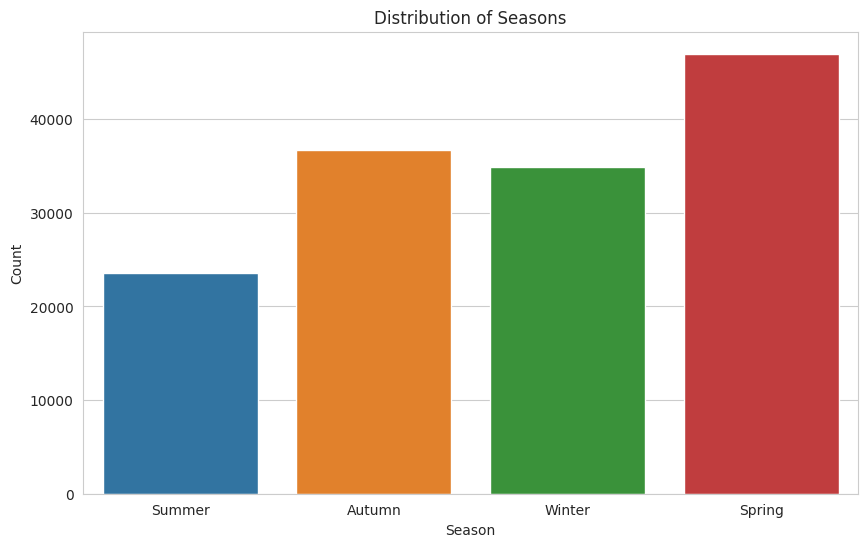

In [ ]:
sns.set_style("whitegrid")

# Distribution of the 'Year' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

month_names = {
    0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June',
    6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December'
}

# month names
df['MonthName'] = df['Month'].map(month_names)

# Distribution of the 'Month' column with month names
plt.figure(figsize=(12, 6))
sns.countplot(x='MonthName', data=df, order=list(month_names.values()))
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
df.drop('MonthName',axis=1)
plt.show()

# Distribution of the 'Season' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df, order=['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


### Rainfall distribution according to months,seasons and years

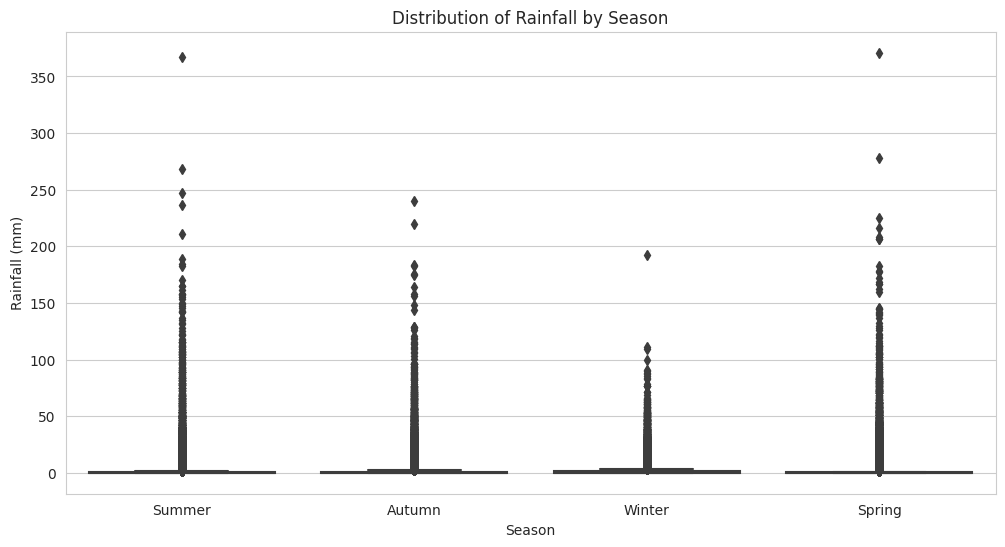

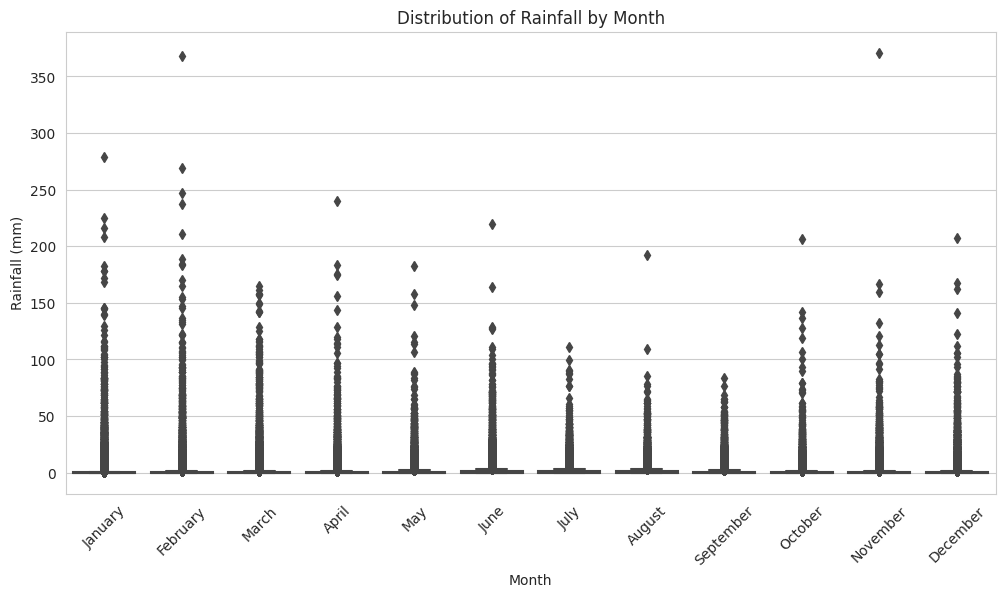

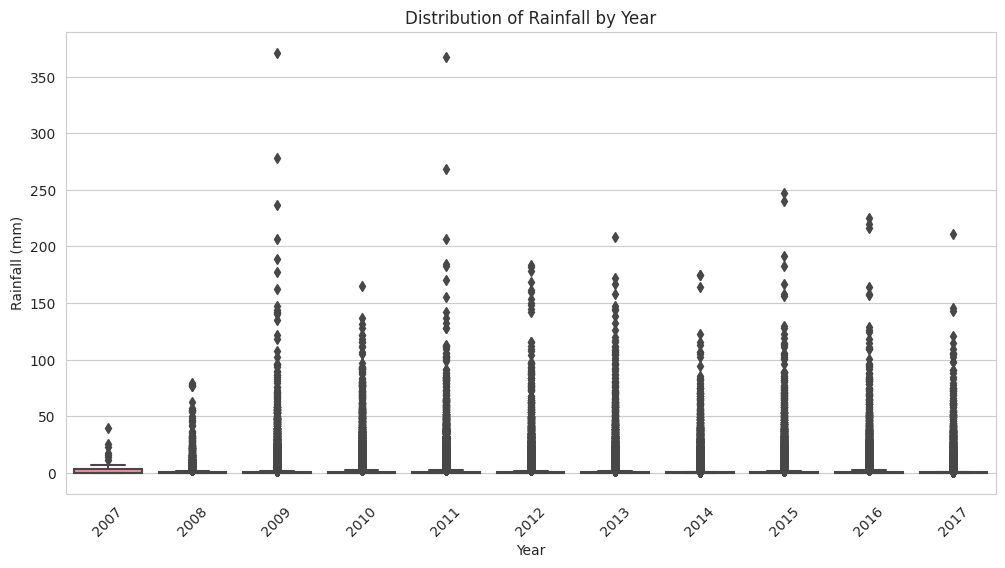

In [ ]:
# Distribution of Rainfall by Seasons
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Season', y='Rainfall', order=['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title('Distribution of Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.show()

# Distribution of Rainfall by Months
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MonthName', y='Rainfall', order=list(month_names.values()))
plt.title('Distribution of Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)  # Rotate the x labels to make them readable
plt.show()

# Distribution of Rainfall by Years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='Rainfall')
plt.title('Distribution of Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)  # Rotate the x labels to make them readable
plt.show()


### Writing seasons as numerical.

In [ ]:
season_mapping = {'Summer': 0, 'Winter': 1, 'Spring': 2, 'Autumn': 3}
df['Season'] = df['Season'].map(season_mapping)
df.drop('MonthName',axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,11,2
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,11,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,11,2
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,11,2
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,11,2


### Evaluate the year column categorically and encode as sequential integers ⏱

In [ ]:
df['Year'] = df['Year'] - df['Year'].min()
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,11,2
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,1,11,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,1,11,2
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,1,11,2
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,1,11,2


## Location column 🗺

In [ ]:
# Firstly , let's look at the unique values of location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# Create a mapping dictionary for the 'Location' column
location_mapping = {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3}

# Map the 'Location' column to numerical values
df['Location'] = df['Location'].map(location_mapping)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season
0,0.0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,11,2
1,0.0,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,1,11,2
2,0.0,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,1,11,2
3,0.0,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,1,11,2
4,0.0,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,1,11,2


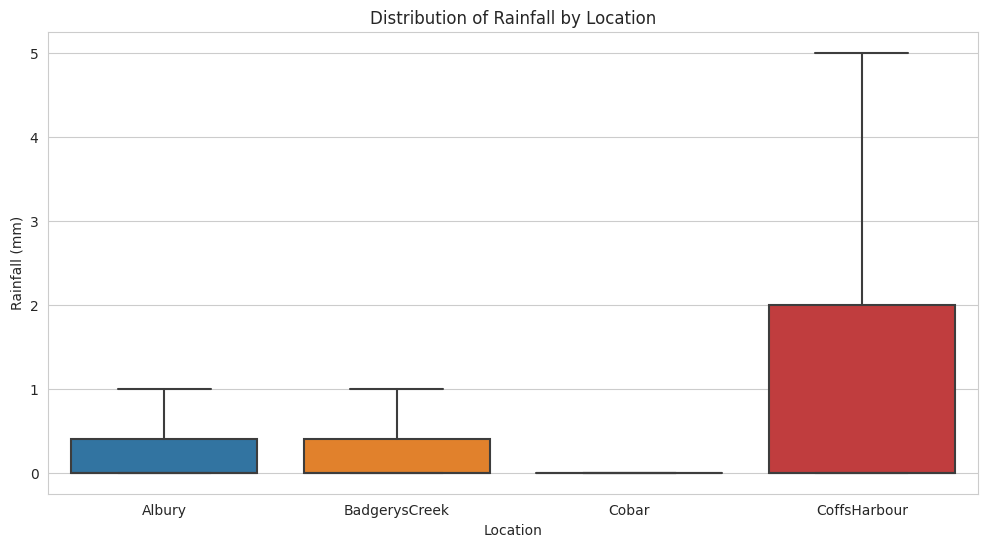

In [ ]:
location_mapping = {0: 'Albury', 1: 'BadgerysCreek', 2: 'Cobar', 3: 'CoffsHarbour'}
df['Location_Num'] = df['Location'].map(location_mapping)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location_Num', y='Rainfall', showfliers=False)
plt.title('Distribution of Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Rainfall (mm)')

# Label the x-axis with location names using location_mapping
location_labels = [value for key, value in sorted(location_mapping.items(), key=lambda item: item[0])]
plt.xticks(range(len(location_labels)), location_labels)

plt.show()

# Drop the 'Location_Num' column if you don't need it in your DataFrame
df.drop('Location_Num', axis=1, inplace=True)


## MinTemp , MaxTemp column 🌡

### Getting info (mean,mode,null counts...)

In [ ]:
temp_stats = df[['MinTemp', 'MaxTemp']].describe()

# Get the number of null values for both columns
null_values = df[['MinTemp', 'MaxTemp']].isnull().sum()

min_temp_mode = df['MinTemp'].mode().iloc[0]
max_temp_mode = df['MaxTemp'].mode().iloc[0]

# Combine all the information into one dictionary
temp_info = {
    'Descriptive Statistics': temp_stats,
    'Null Values': null_values,
    'Mode': {'MinTemp': min_temp_mode, 'MaxTemp': max_temp_mode}
}


# Display Descriptive Statistics
print(temp_info['Descriptive Statistics'])

# Display Null Values
print("\nNull Values:")
null_values_table = PrettyTable()
null_values_table.field_names = ['MinTemp', 'MaxTemp']
null_values_table.add_row(temp_info['Null Values'])
print(null_values_table)

# Display Mode
print("\nMode:")
mode_table = PrettyTable()
mode_table.field_names = ['MinTemp', 'MaxTemp']
mode_table.add_row([temp_info['Mode']['MinTemp'], temp_info['Mode']['MaxTemp']])
print(mode_table)

             MinTemp        MaxTemp
count  141556.000000  141871.000000
mean       12.186400      23.226784
std         6.403283       7.117618
min        -8.500000      -4.800000
25%         7.600000      17.900000
50%        12.000000      22.600000
75%        16.800000      28.200000
max        33.900000      48.100000

Null Values:
+---------+---------+
| MinTemp | MaxTemp |
+---------+---------+
|   637   |   322   |
+---------+---------+

Mode:
+---------+---------+
| MinTemp | MaxTemp |
+---------+---------+
|   9.6   |   20.0  |
+---------+---------+


### Filling null values with mean of the column

In [ ]:
# Calculate the mean values for 'MinTemp' and 'MaxTemp'
min_temp_mean = df['MinTemp'].mean()
max_temp_mean = df['MaxTemp'].mean()

# Fill null values with mean values
df['MinTemp'].fillna(min_temp_mean, inplace=True)
df['MaxTemp'].fillna(max_temp_mean, inplace=True)

# Verify that null values are filled
df[['MinTemp', 'MaxTemp']].isnull().sum()


MinTemp    0
MaxTemp    0
dtype: int64

## Doing the same proccess to the rest of columns whose type is float64 🔎

In [ ]:
for column in df.select_dtypes(include=['float64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)
    print('Check the column of ',column,'=> ',df[column].isnull().sum())


Check the column of  Location =>  0
Check the column of  MinTemp =>  0
Check the column of  MaxTemp =>  0
Check the column of  Rainfall =>  0
Check the column of  Evaporation =>  0
Check the column of  Sunshine =>  0
Check the column of  WindGustSpeed =>  0
Check the column of  WindSpeed9am =>  0
Check the column of  WindSpeed3pm =>  0
Check the column of  Humidity9am =>  0
Check the column of  Humidity3pm =>  0
Check the column of  Pressure9am =>  0
Check the column of  Pressure3pm =>  0
Check the column of  Cloud9am =>  0
Check the column of  Cloud3pm =>  0
Check the column of  Temp9am =>  0
Check the column of  Temp3pm =>  0


##  Proccessing columns whose type is object (fill null values and convert to numeric) ⭐

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    # Fill NaN with mode
    df[column].fillna(df[column].mode()[0], inplace=True)
    # Check for nulls after filling
    print(f'Null values in {column}:', df[column].isnull().sum())

    # Convert the column to numerical values using LabelEncoder
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

# Showing the updated DataFrame with encoded values
df.head()

Null values in WindGustDir: 0
Null values in WindDir9am: 0
Null values in WindDir3pm: 0
Null values in RainToday: 0
Null values in RainTomorrow: 0


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season
0,0.0,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,1007.1,8.000000,4.503167,16.9,21.8,0,0,1,11,2
1,0.0,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,1007.8,4.437189,4.503167,17.2,24.3,0,0,1,11,2
2,0.0,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,1008.7,4.437189,2.000000,21.0,23.2,0,0,1,11,2
3,0.0,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,1012.8,4.437189,4.503167,18.1,26.5,0,0,1,11,2
4,0.0,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,1,11,2


## GENERAL CHECKING NULL VALUE COUNTS AND TYPES OF ALL COLUMNS 🪂

In [ ]:
info = pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
info.rename(columns={'index': 'col_name', 0: 'null_count'}, inplace=True)
info['null_percentage'] = info['null_count'] / df.shape[0] * 100
info['value_type'] = df.dtypes.values

info

,col_name,null_count,null_percentage,value_type
0,Location,0,0.0,float64
1,Year,0,0.0,float64
2,RainTomorrow,0,0.0,float64
3,RainToday,0,0.0,float64
4,Temp3pm,0,0.0,float64
5,Temp9am,0,0.0,float64
6,Cloud3pm,0,0.0,int64
7,Cloud9am,0,0.0,float64
8,Pressure3pm,0,0.0,int64
9,Pressure9am,0,0.0,int64


## ANALYZE THE DATA 🔷

### Checking for imbalance ⚖

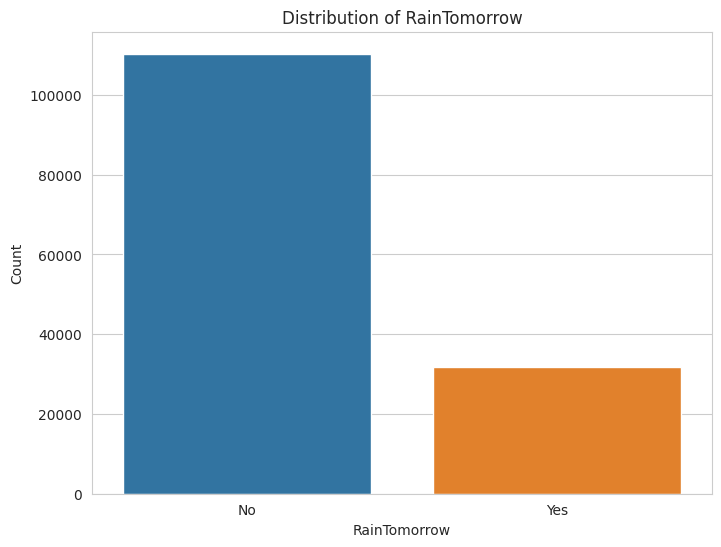

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()

### Comparing RandomForest method with oversampled,undersampled and orginal dataset to choose best way to handle imbalance problem ⚡

In [ ]:
df_fake = df
# Create copies of the dataframe for different resampling techniques
df_oversample = df_fake.copy()
df_undersample = df_fake.copy()

# Split the dataset
X = df_fake.drop('RainTomorrow', axis=1)
y = df_fake['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversample the minority class
smote = SMOTE(random_state=42)
X_train_oversample, y_train_oversample = smote.fit_resample(X_train_scaled, y_train)

# Undersample the majority class
under = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = under.fit_resample(X_train_scaled, y_train)

# Train models and evaluate
models = {
    'RandomForest_original': RandomForestClassifier(random_state=42),
    'RandomForestClassifier_oversample': RandomForestClassifier(random_state=42),
    'RandomForest_undersample': RandomForestClassifier(random_state=42)
}

# Train on original data
models['RandomForest_original'].fit(X_train_scaled, y_train)
y_pred_original = models['RandomForest_original'].predict(X_test_scaled)

# Train on oversampled data
models['RandomForestClassifier_oversample'].fit(X_train_oversample, y_train_oversample)
y_pred_oversample = models['RandomForestClassifier_oversample'].predict(X_test_scaled)

# Train on undersampled data
models['RandomForest_undersample'].fit(X_train_undersample, y_train_undersample)
y_pred_undersample = models['RandomForest_undersample'].predict(X_test_scaled)

# Evaluate the models
print("Random Forest on original data:")
print(classification_report(y_test, y_pred_original))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_original))

print("\n\n\n\n Random Forest on oversampled data:")
print(classification_report(y_test, y_pred_oversample))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_oversample))

print("\n\n\n\nRandom Forest on undersampled data:")
print(classification_report(y_test, y_pred_undersample))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_undersample))

Random Forest on original data:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.76      0.51      0.61      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.85      0.85      0.84     28439

ROC AUC score: 0.7302488867349781




 Random Forest on oversampled data:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     22098
           1       0.66      0.64      0.65      6341

    accuracy                           0.85     28439
   macro avg       0.78      0.77      0.78     28439
weighted avg       0.84      0.85      0.84     28439

ROC AUC score: 0.7736318172027462




Random Forest on undersampled data:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22098
           1       0.54      0.78      0.64      6341

  

 ⚛ Based on the ROC AUC score and the F1-score for the minority class, the undersampling method would be considered the better approach for this dataset among the ones listed.

### Appyle undersampling to real dataset ⚒

Class Distribution after Undersampling:
0    31877
1    31877
Name: RainTomorrow, dtype: int64


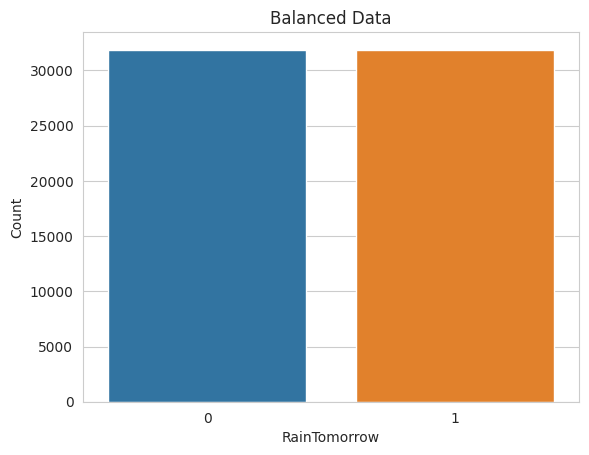

In [ ]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine the undersampled features and target variable into a new DataFrame
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='RainTomorrow')], axis=1)

# Display the class distribution after undersampling
print("Class Distribution after Undersampling:")
print(df['RainTomorrow'].value_counts())

sns.countplot(x=y_resampled)
plt.title('Balanced Data')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()

### Correlation ⚔

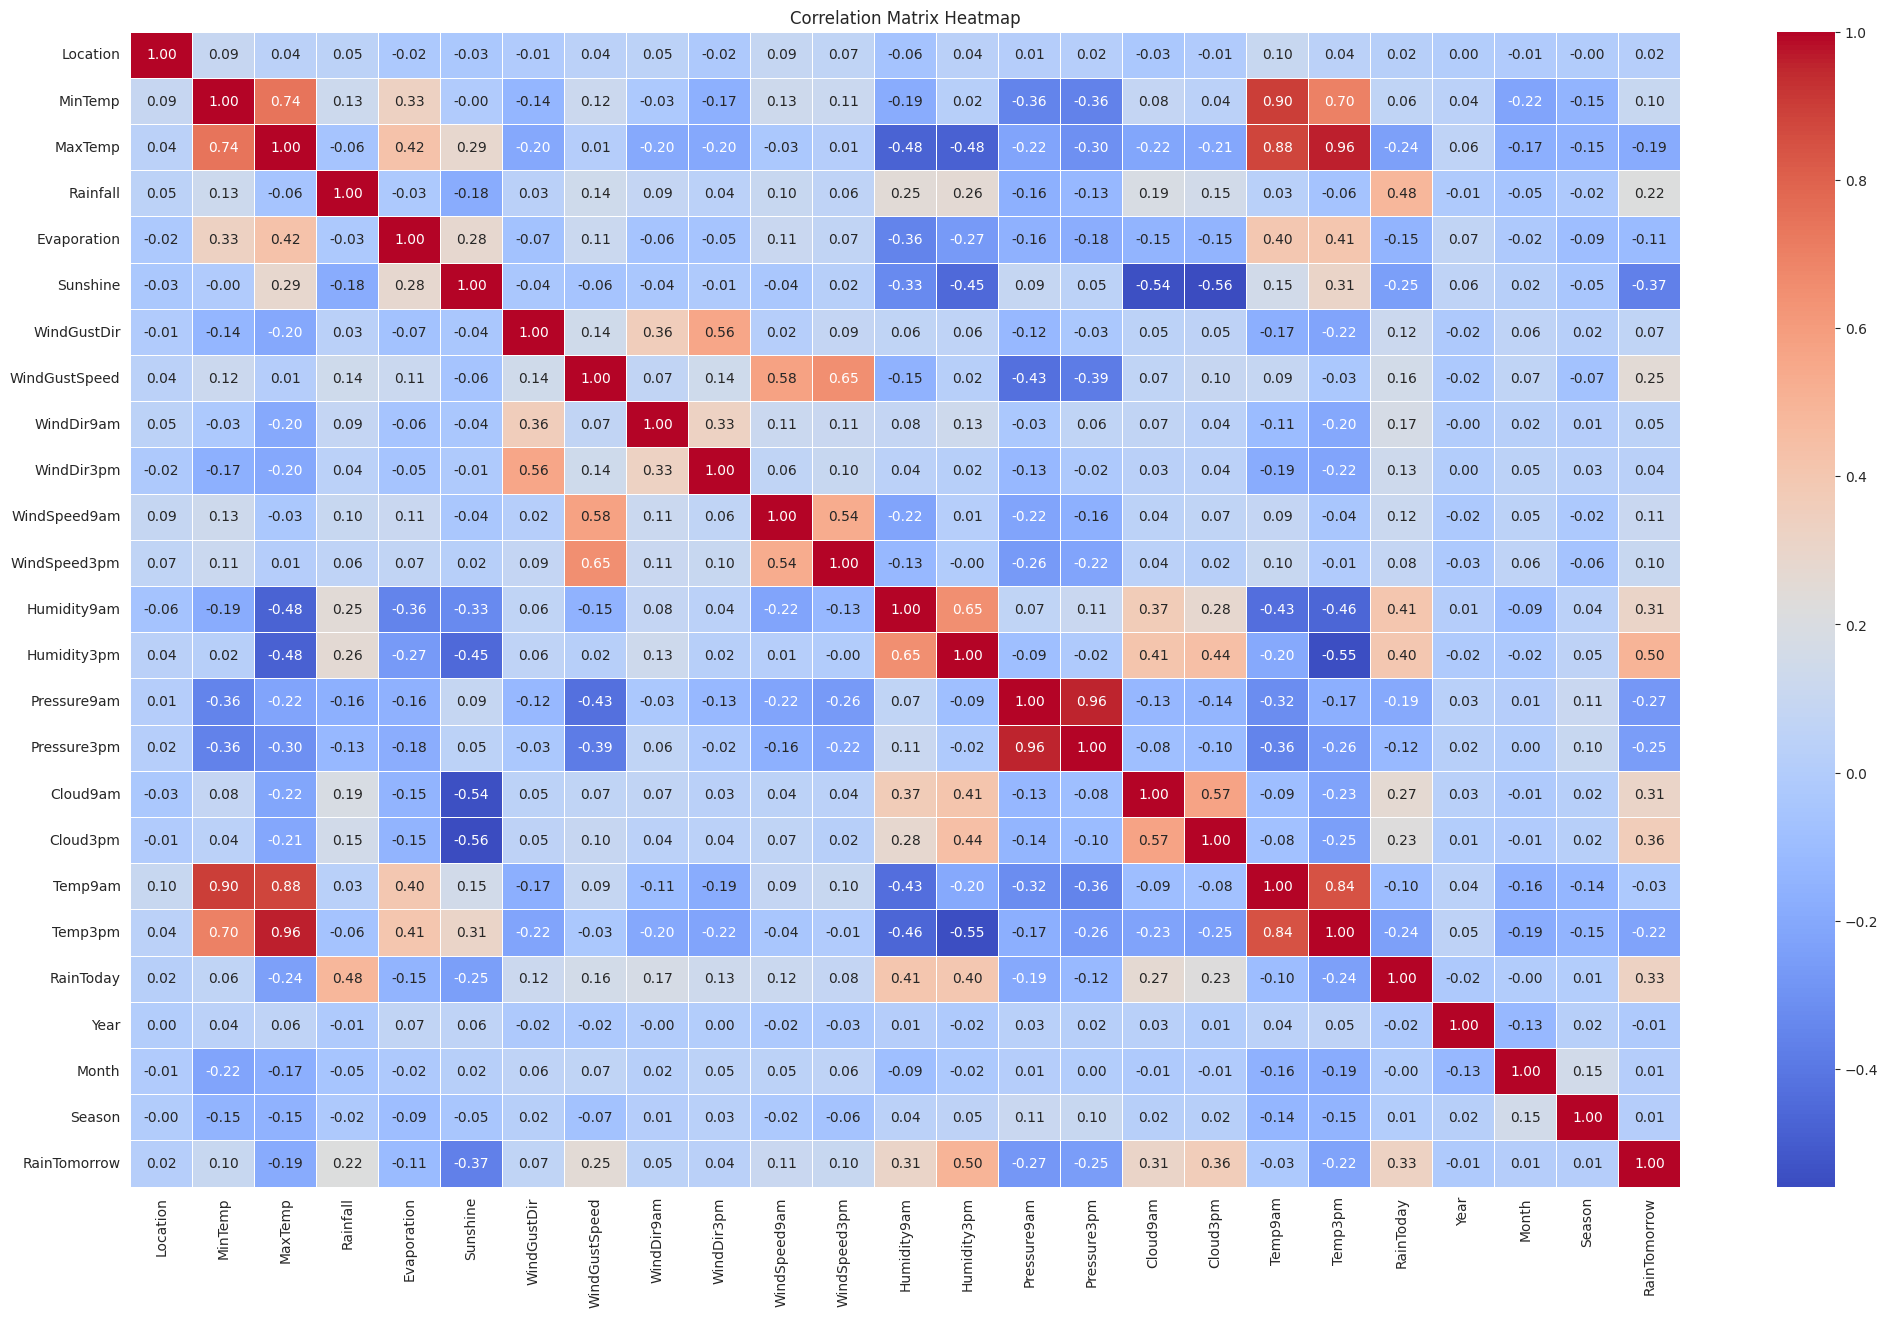

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

1. **Temperature Relationships**: Minimum and maximum temperatures are highly related, as expected. They also relate well with temperatures recorded at 9 am and 3 pm, indicating that daily temperatures are consistent and predictable.

2. **Rain and Evaporation**: Rainfall does not seem to have a strong relationship with evaporation, suggesting that other factors might be influencing evaporation rates.

3. **Sunshine**: Sunshine levels have some negative relationships with other weather variables like cloud cover and humidity, which is logical since more clouds or higher humidity usually means less sunshine.

4. **Wind Directions and Speeds**: The wind direction at different times of the day doesn't strongly correlate with many other variables, but wind speeds do show some relationship with other wind measurements, indicating some predictability in wind patterns throughout the day.

5. **Humidity**: Morning and afternoon humidity levels are strongly linked, showing that days that start humid tend to end that way too.

6. **Pressure**: Morning and afternoon atmospheric pressures are closely related, suggesting little change throughout the day.

7. **Cloud Cover**: Cloudiness in the morning and afternoon shows some positive relationship, hinting that cloudy mornings often lead to cloudy afternoons.

8. **Predicting Rain**: The variable 'RainTomorrow' has some moderate correlations with variables like humidity and rain today, but not so much with others, indicating that predicting rain could be a bit complex and might need to consider multiple factors.

9. **Yearly Influence**: The 'Year' variable shows low correlation with most variables and with 'RainTomorrow', suggesting that year-to-year changes don't have a straightforward impact on daily weather patterns.

10. **Seasonal Influence**: The 'Month' and 'Season' variables show weak to moderate correlations with weather conditions, hinting at some seasonal influence but not a direct strong predictor for rain the next day.


### Testing impact of Year and Season column to decide drop them or not 🤔

In [ ]:
# Separate the features and the target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Evaluate with all columns
model = RandomForestClassifier(random_state=42)
scores_all = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy with all features: {scores_all.mean():.4f} ")

def evaluate_impact(columns_to_drop):
    X_reduced = X.drop(columns_to_drop, axis=1)
    scores_reduced = cross_val_score(model, X_reduced, y, cv=5, scoring='accuracy')
    print(f"Accuracy without {', '.join(columns_to_drop)}: {scores_reduced.mean():.4f}")


print('\n\n')
evaluate_impact(['Year'])

print('\n\n')
evaluate_impact(['Season'])

print('\n\n')
evaluate_impact(['Month'])

print('\n\n')
evaluate_impact(['Year', 'Season'])

print('\n\n')
evaluate_impact(['Year', 'Month'])

print('\n\n')
evaluate_impact(['Month', 'Season'])

print('\n\n')
evaluate_impact(['Year', 'Season','Month'])

Accuracy with all features: 0.7294 



Accuracy without Year: 0.7328



Accuracy without Season: 0.7315



Accuracy without Month: 0.7319



Accuracy without Year, Season: 0.7304



Accuracy without Year, Month: 0.7307



Accuracy without Month, Season: 0.7298



Accuracy without Year, Season, Month: 0.7293


✔ Since the accuracy is higher without Year and Month, I will drop these columns.

In [ ]:
df = df.drop(['Year', 'Month'], axis=1)

# CLASSIFICATION 💐

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Season,RainTomorrow
0,1.495202,18.0,22.1,0.0,9.200000,6.900000,13,39.984292,8,9,...,57.0,1024.2,1021.9,7.000000,4.503167,19.1,21.8,0,2,0
1,1.495202,17.5,24.9,0.0,5.469824,7.624853,8,52.000000,5,4,...,75.0,1012.4,1007.2,4.437189,4.503167,21.8,24.2,0,2,0
2,1.495202,18.3,39.2,0.0,13.400000,12.500000,4,31.000000,4,3,...,11.0,1014.5,1009.1,7.000000,7.000000,30.5,37.6,0,2,0
3,1.495202,16.2,33.1,0.0,5.469824,7.624853,11,31.000000,3,12,...,40.0,1015.6,1013.6,4.437189,4.503167,21.9,30.4,0,0,0
4,2.000000,6.5,21.1,0.0,2.600000,7.624853,12,24.000000,0,12,...,22.0,1024.8,1022.2,1.000000,3.000000,14.2,20.8,0,3,0


## Scale dataset 🎶

In [ ]:
features = df.drop('RainTomorrow', axis=1)
target = df['RainTomorrow']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(df_scaled_features, target, test_size=0.2, random_state=42)

df_scaled_features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Season
0,-0.007944,0.858196,-0.049804,-0.334569,1.268563,-0.044217,1.030769,-0.137254,0.201471,0.247507,...,-0.166194,-0.023701,1.083705,1.092879,0.977481,-0.205405,0.348755,0.145857,-0.664076,0.313506
1,-0.007944,0.779804,0.344035,-0.334569,0.057787,0.205370,-0.045623,0.710735,-0.466751,-0.863433,...,0.861275,0.812256,-0.604714,-1.030233,-0.173937,-0.205405,0.768514,0.495136,-0.664076,0.313506
2,-0.007944,0.905232,2.355425,-0.334569,2.631839,1.884024,-0.906736,-0.771306,-0.689492,-1.085621,...,-3.464910,-2.160036,-0.304232,-0.755817,0.977481,0.995372,2.121073,2.445280,-0.664076,0.313506
3,-0.007944,0.575985,1.497419,-0.334569,0.057787,0.205370,0.600212,-0.771306,-0.912232,0.914072,...,-0.706967,-0.813216,-0.146837,-0.105885,-0.173937,-0.205405,0.784061,1.397441,-0.664076,-1.617912
4,1.524095,-0.944822,-0.190461,-0.334569,-0.873727,0.205370,0.815490,-1.265320,-1.580454,0.914072,...,-1.031431,-1.649173,1.169557,1.136208,-1.718197,-0.928309,-0.413031,0.000324,-0.664076,1.279216


## Traditional Machine Learning Models ❤

In [ ]:
# Dictionary that maps method names to the actual sklearn classifiers
model_dict = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'svm': SVC(),
    'decision_tree': DecisionTreeClassifier(),
    'naive_bayes': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'sgd_classifier': SGDClassifier(max_iter=1000),
    'lda': LinearDiscriminantAnalysis(),
    'qda': QuadraticDiscriminantAnalysis()
}

# Function to train, predict, and evaluate with cross-validation and hyperparameter tuning
def train_predict_evaluate_cv(method_name, params=None, cv_folds=5):
    # Initialize the model
    model = model_dict[method_name]

    # Define parameter grid for hyperparameter tuning
    param_grid = params if params else {}

    # Create GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=cv_folds, shuffle=True),
        verbose=1,
        n_jobs=-1
    )

    # Fit the model with cross-validation and hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    predictions = best_model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, predictions)

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Classification Report as Heatmap
    classification_report_df = pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).iloc[:-1, :].T

    try:
        # Predict probabilities for ROC Curve
        prediction_probabilities = best_model.predict_proba(X_test)[:, 1]

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, prediction_probabilities)
        roc_auc = auc(fpr, tpr)

        # Plotting
        plt.figure(figsize=(18, 5))

        # Method Name
        print('\n\n\n', method_name, '\n')

        # Confusion Matrix
        plt.subplot(1, 3, 1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title('Confusion Matrix')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

        # Classification Report as Heatmap
        plt.subplot(1, 3, 2)
        sns.heatmap(classification_report_df, annot=True, cmap="Blues")
        plt.title('Classification Report')

        # ROC Curve
        plt.subplot(1, 3, 3)
        plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")

        plt.tight_layout()
        plt.show()

    except AttributeError:
        print(f"ROC Curve is not available for {method_name}.")




 logistic_regression 



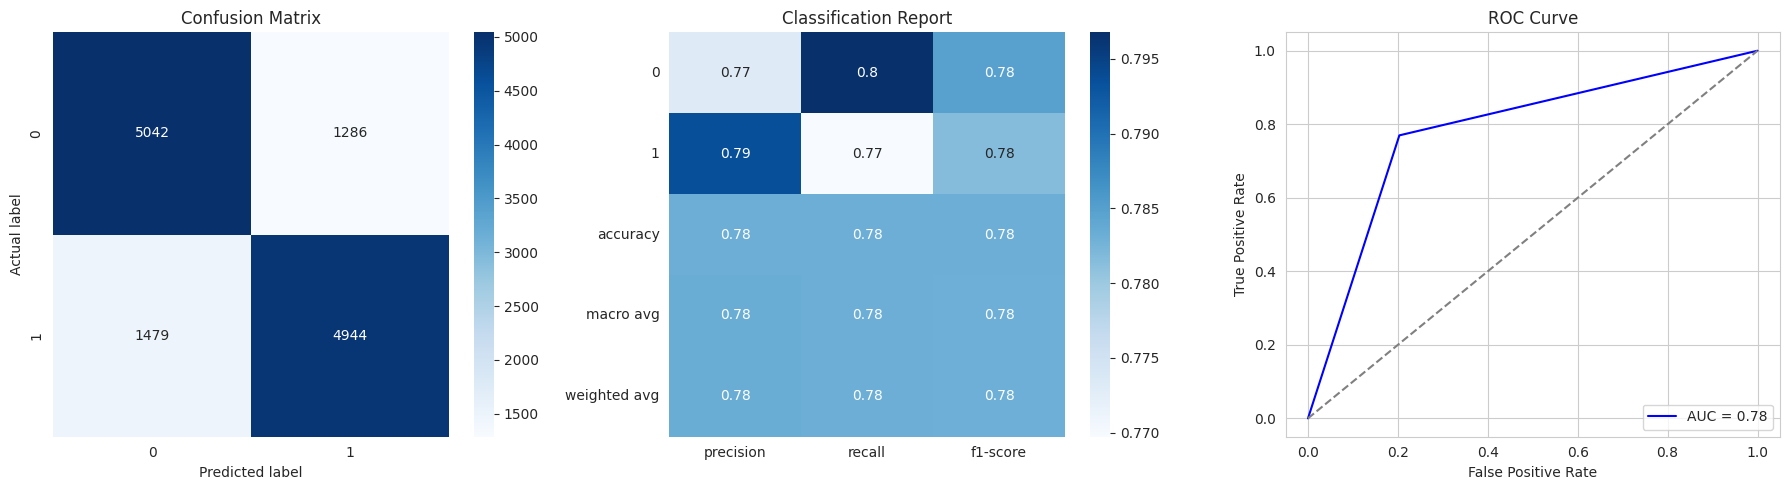




 svm 



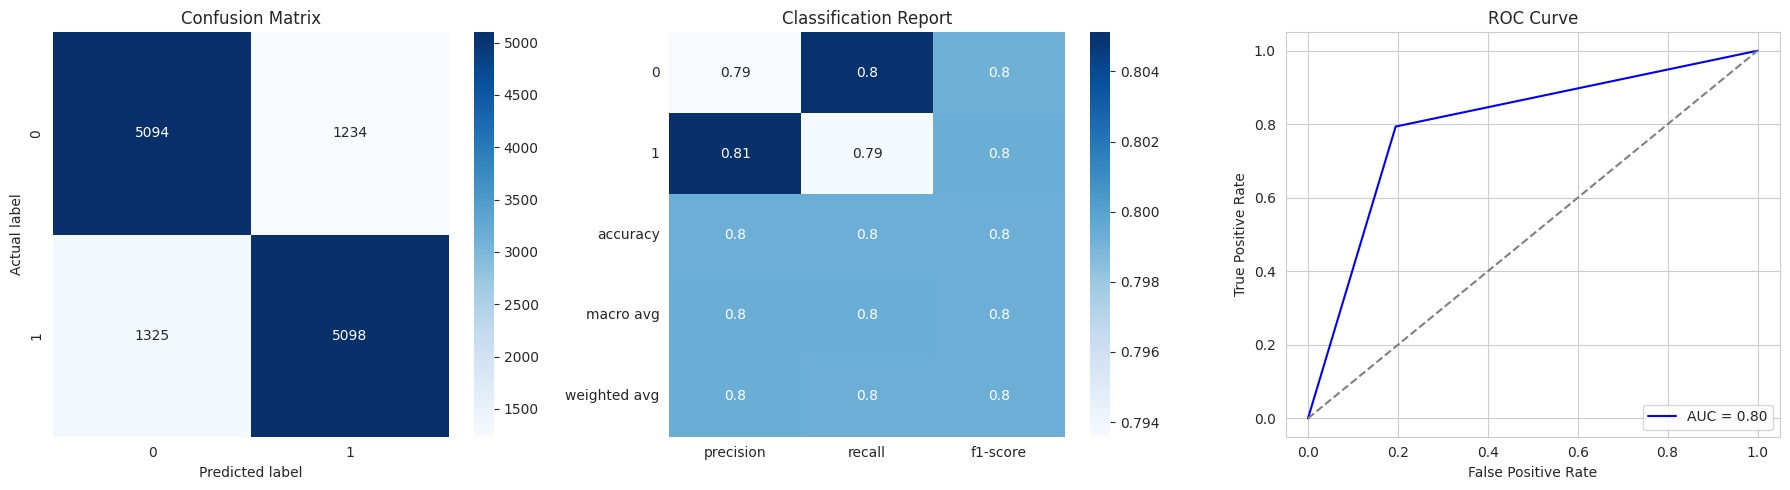




 decision_tree 



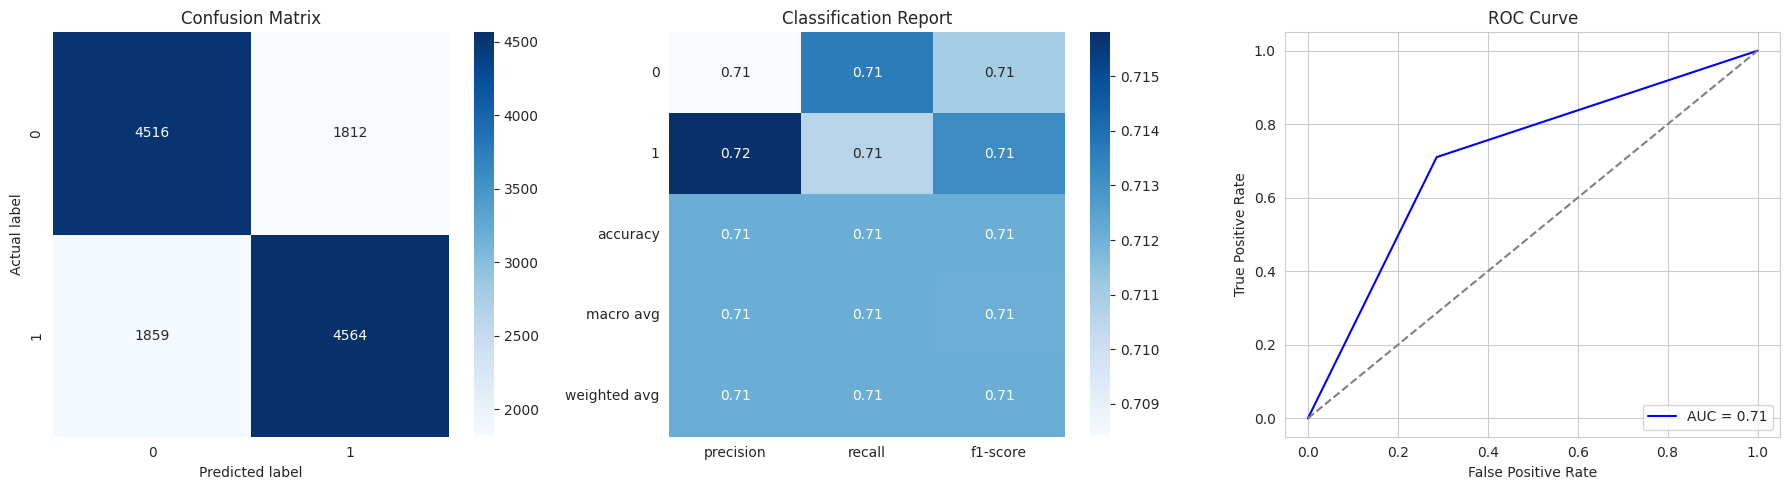




 naive_bayes 



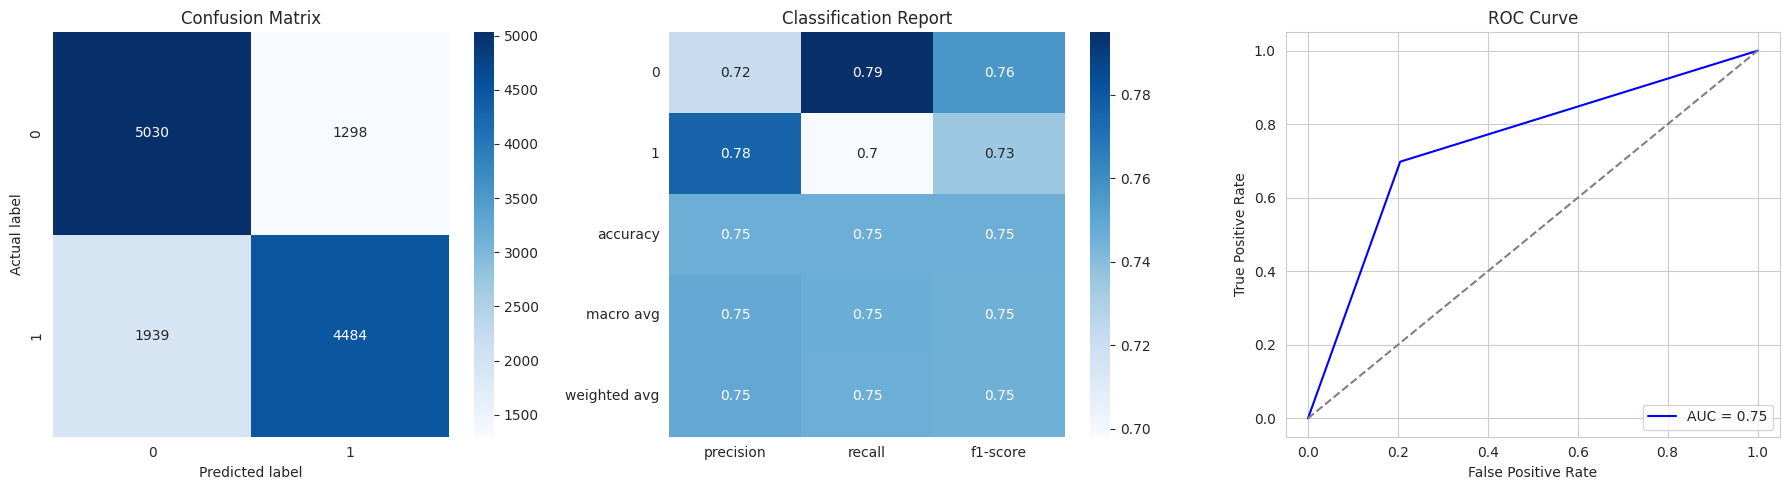




 knn 



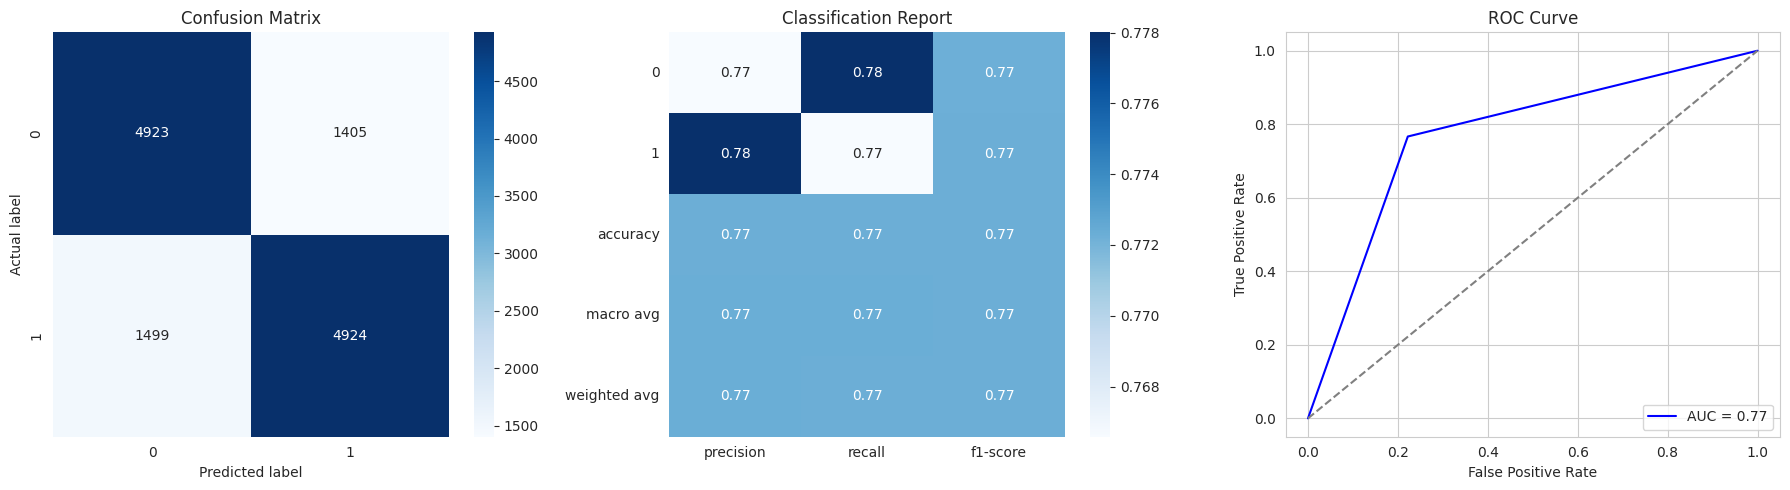




 sgd_classifier 



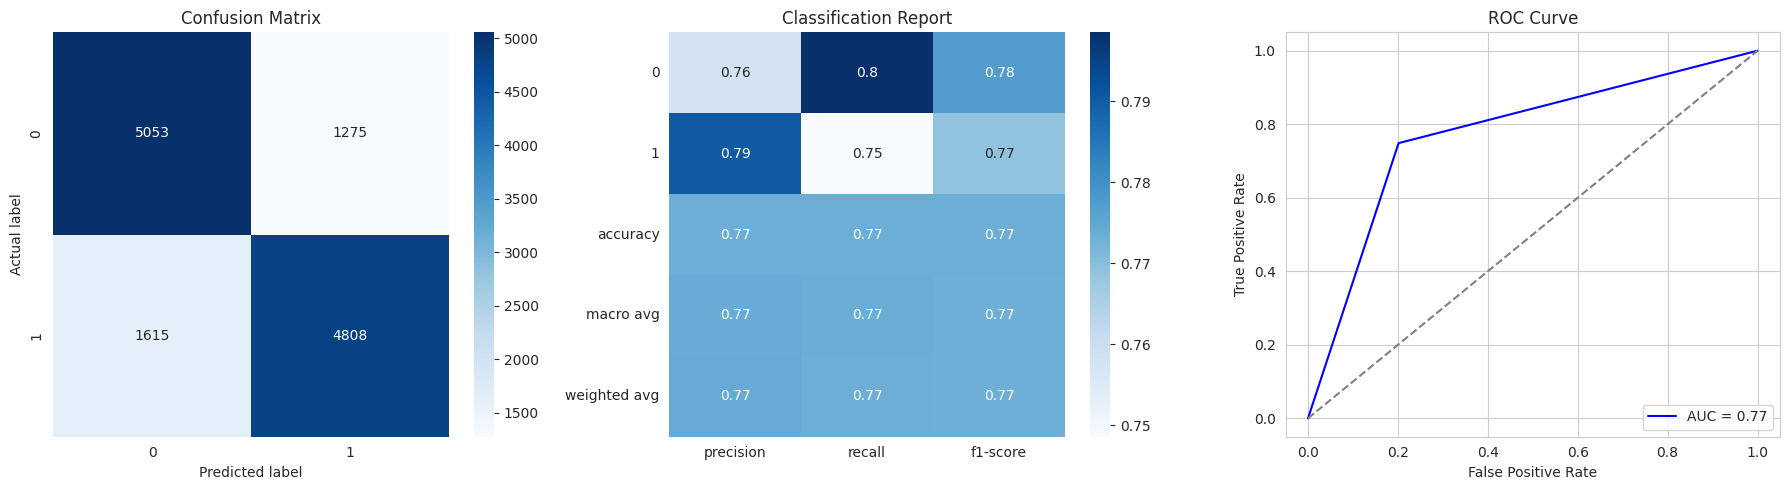




 lda 



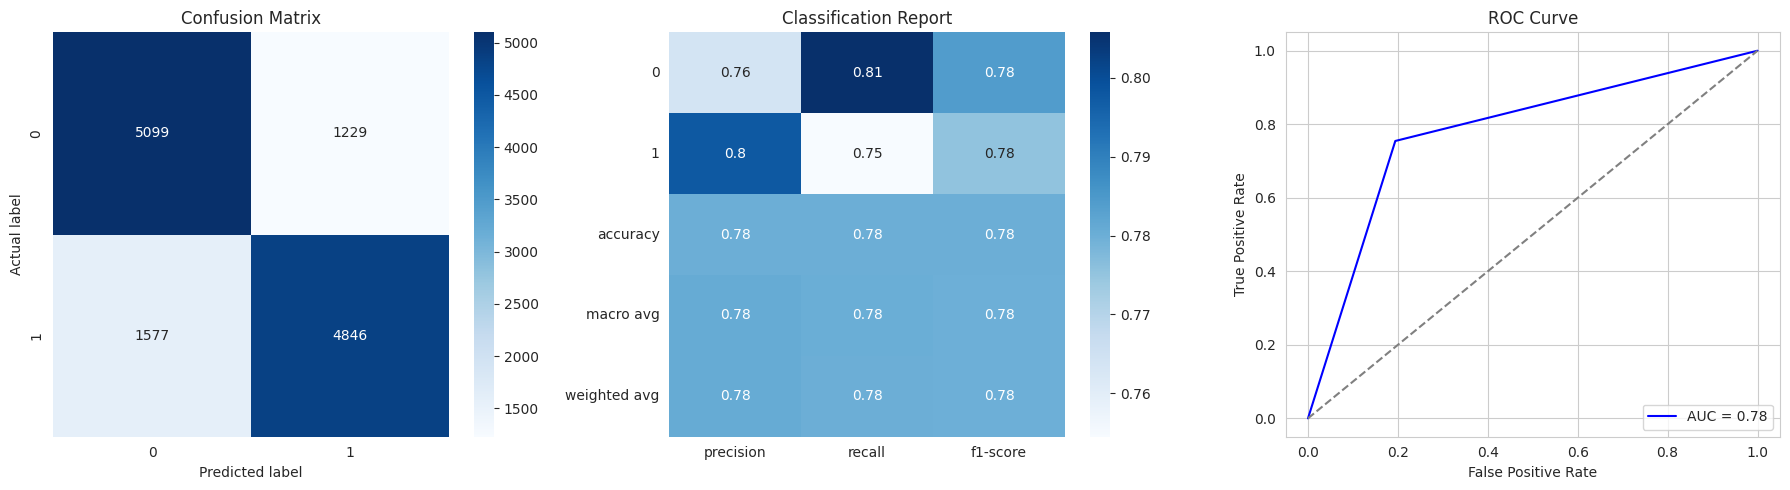




 qda 



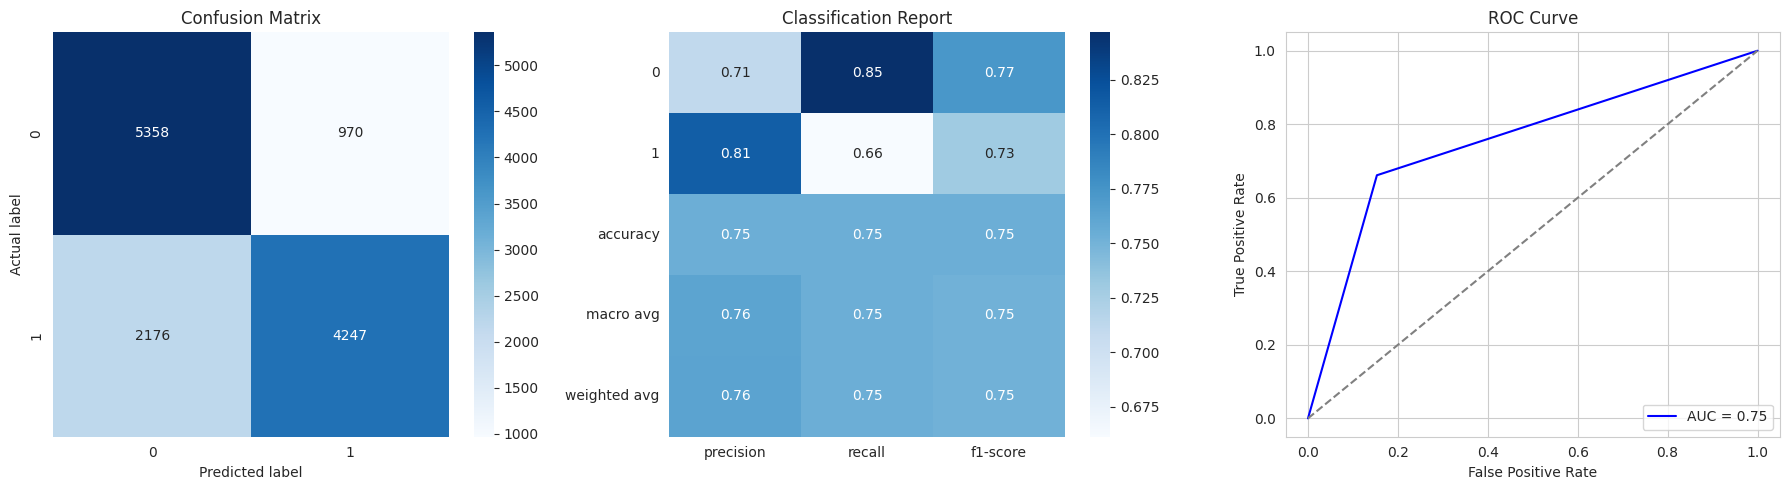

In [ ]:
for method in model_dict:
  train_predict_evaluate(method)

## Ensemble Machine Learning Models 💗

In [ ]:
ensemble_model_dict = {
    'random_forest': RandomForestClassifier(),
    'ada_boost': AdaBoostClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
     'extra_trees': ExtraTreesClassifier(),
    'xgboost': XGBClassifier(),
    'lightgbm': LGBMClassifier()
}

In [ ]:
def train_predict_evaluate_ensemble_cv(method_name, params=None, cv_folds=5):
    if method_name not in ensemble_model_dict:
        raise ValueError(f"Method {method_name} not supported. Choose from {list(ensemble_model_dict.keys())}")

    # Initialize the model
    model = ensemble_model_dict[method_name]

    # Define parameter grid for hyperparameter tuning
    param_grid = params if params else {}

    # Create GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=cv_folds, shuffle=True),
        verbose=1,
        n_jobs=-1
    )

    # Fit the model with cross-validation and hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    predictions = best_model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, predictions)

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Classification Report as Heatmap
    classification_report_df = pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).iloc[:-1, :].T

    # Predict probabilities for ROC Curve
    prediction_probabilities = best_model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prediction_probabilities)
    roc_auc = auc(fpr, tpr)

    # Plotting
    plt.figure(figsize=(18, 5))

    # Print Method Name
    print(f'\n\n\nMethod: {method_name}')

    # Confusion Matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Classification Report as Heatmap
    plt.subplot(1, 3, 2)
    sns.heatmap(classification_report_df, annot=True, cmap="Blues")
    plt.title('Classification Report')

    # ROC Curve
    plt.subplot(1, 3, 3)
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Method: random_forest


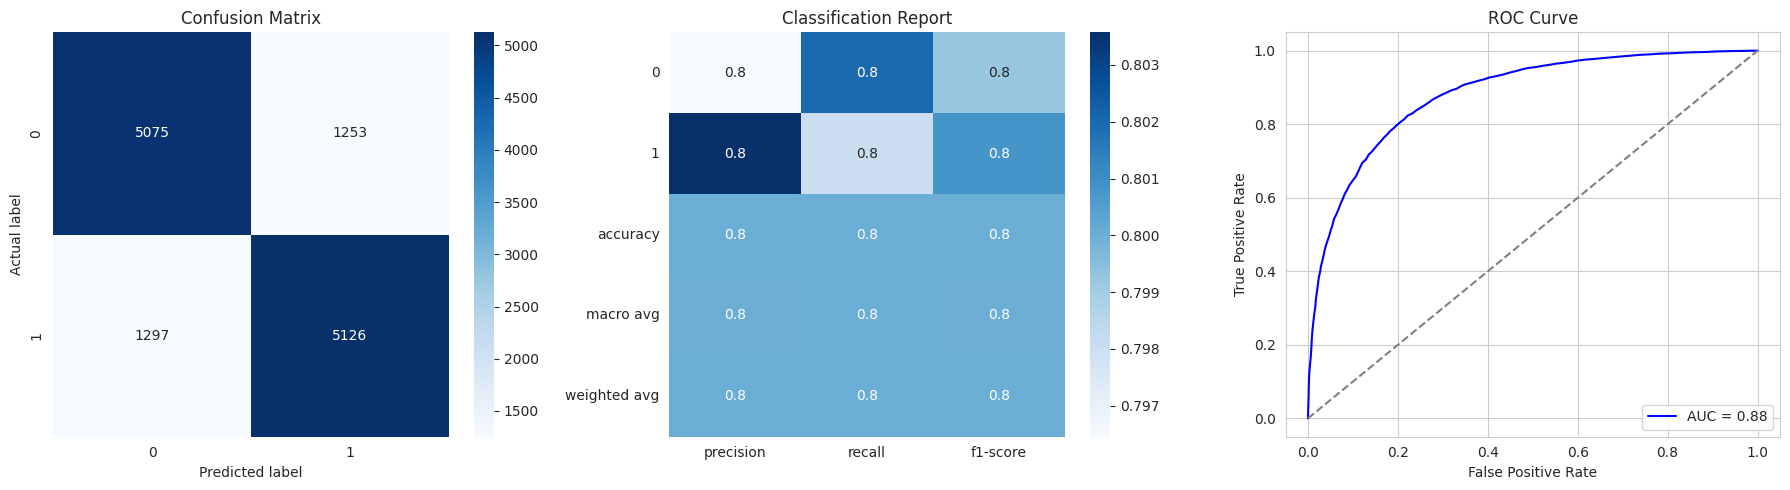

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Method: gradient_boosting


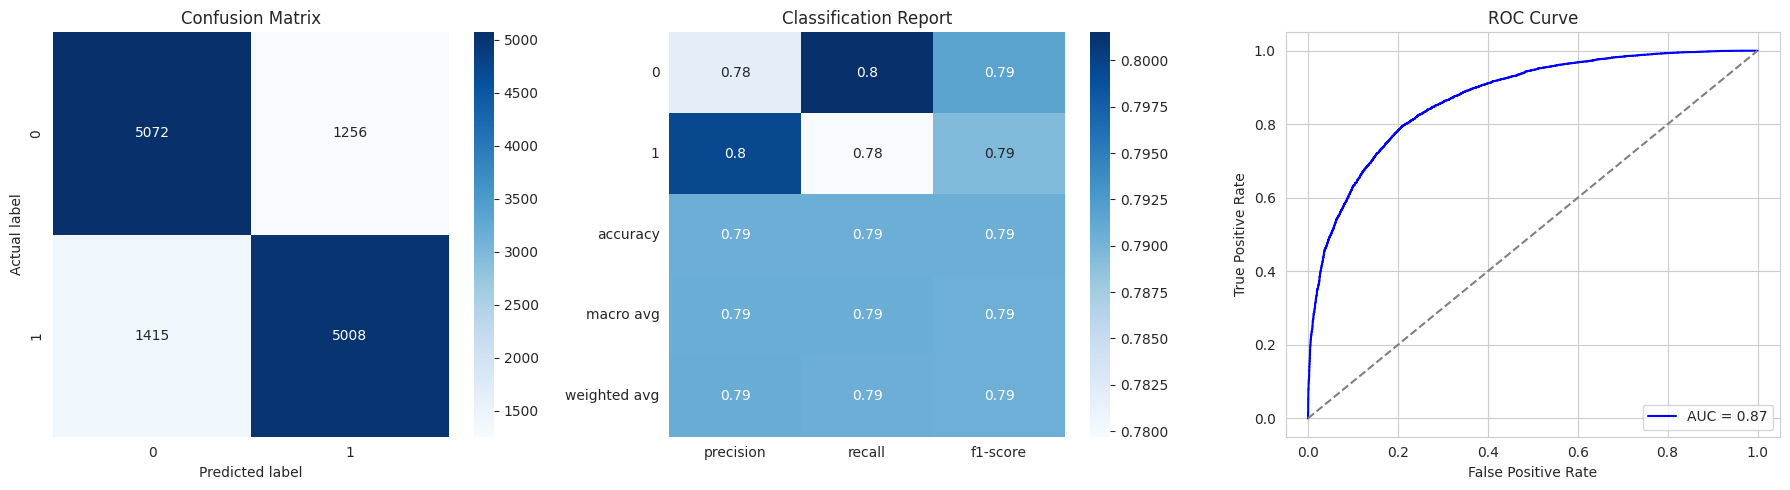

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Method: ada_boost


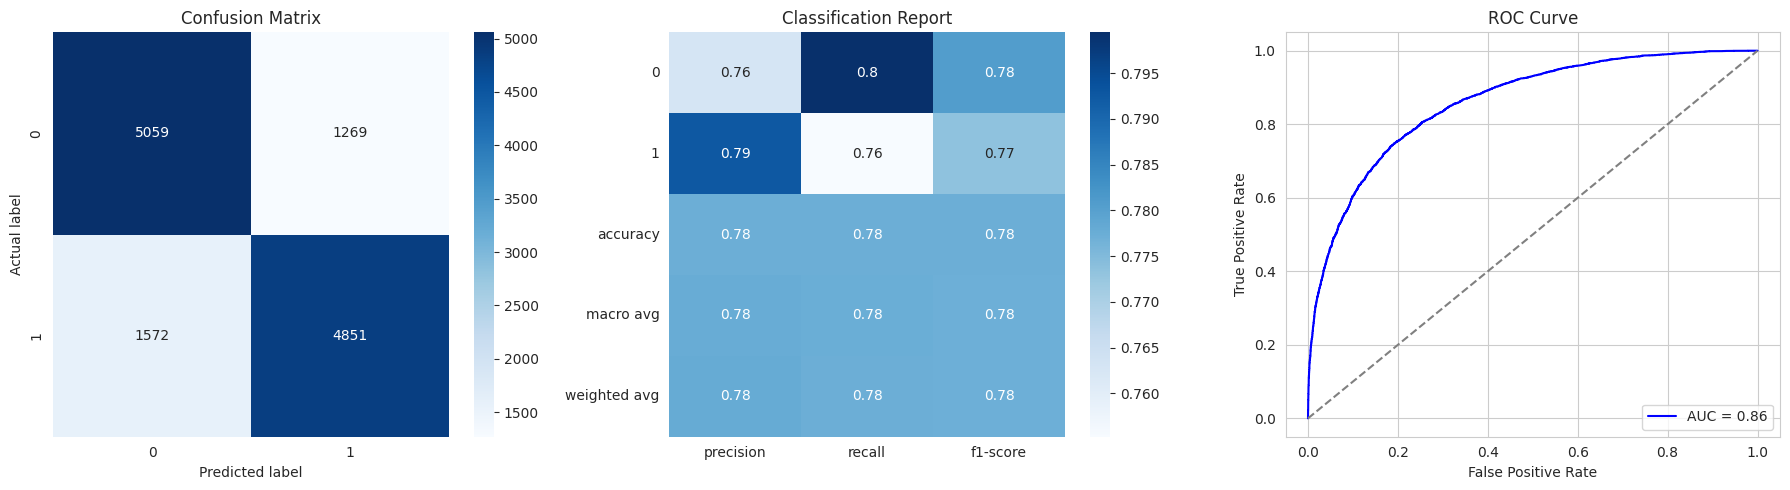

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Method: extra_trees


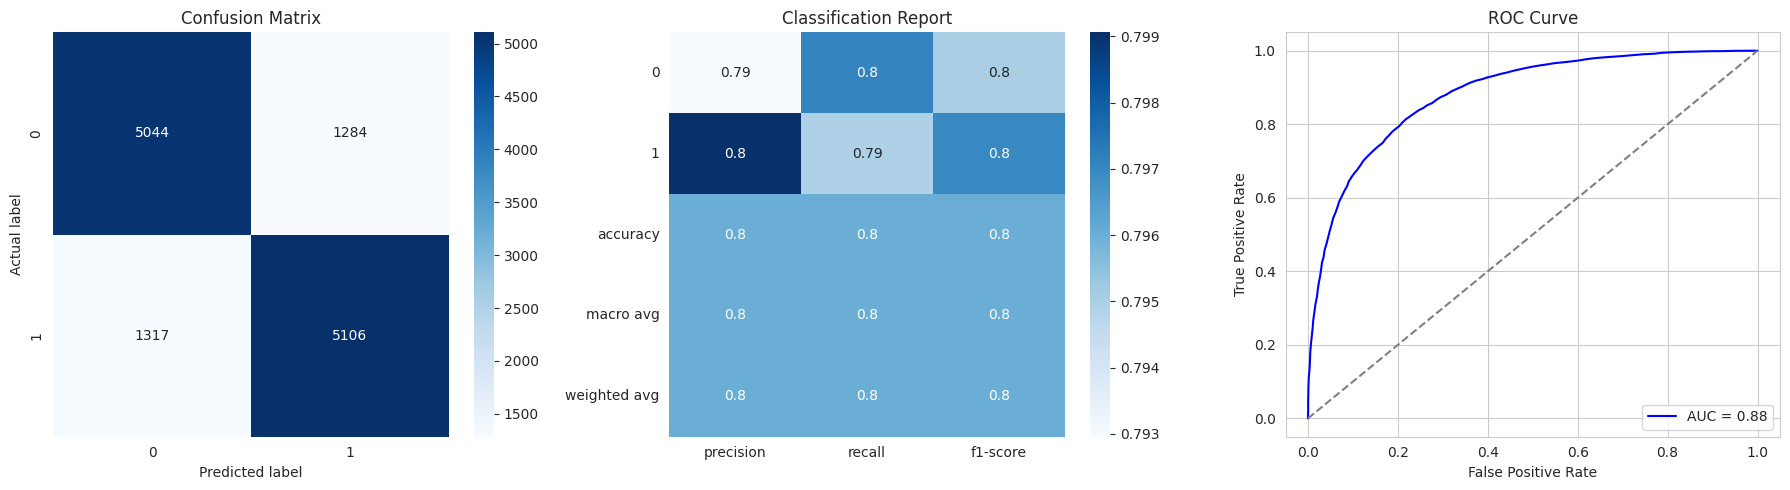

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Method: xgboost


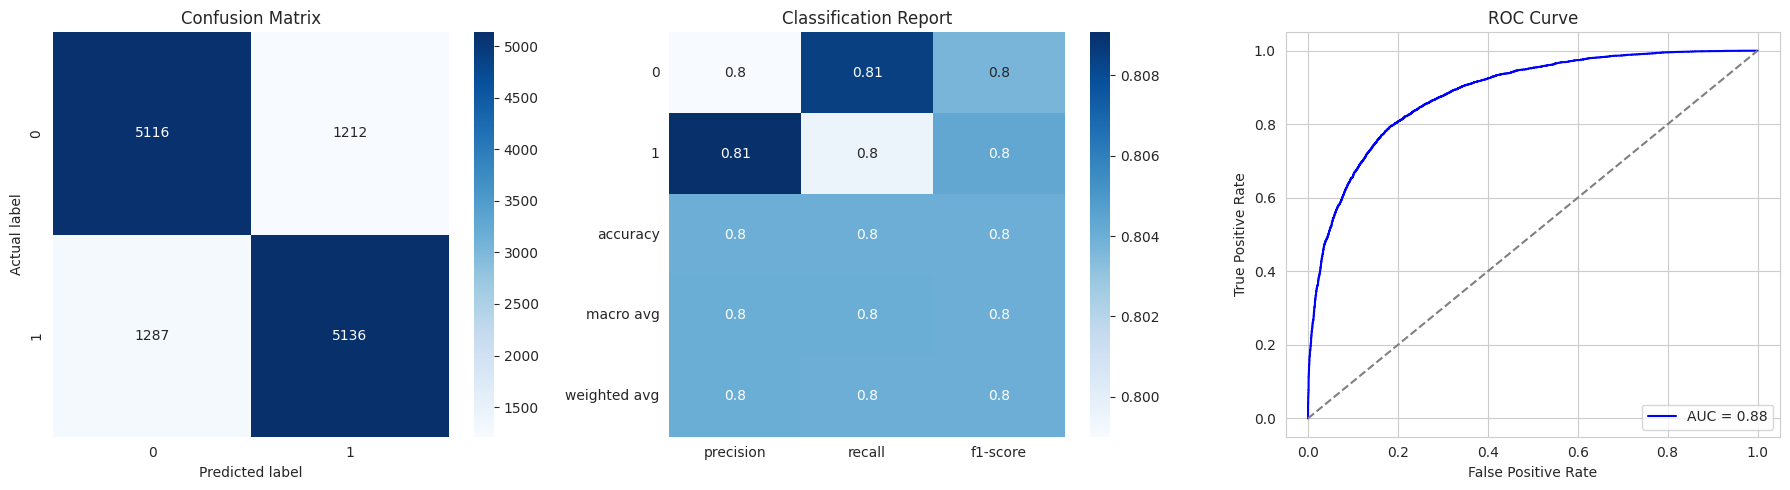

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Number of positive: 25454, number of negative: 25549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 51003, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499069 -> initscore=-0.003725
[LightGBM] [Info] Start training from score -0.003725



Method: lightgbm


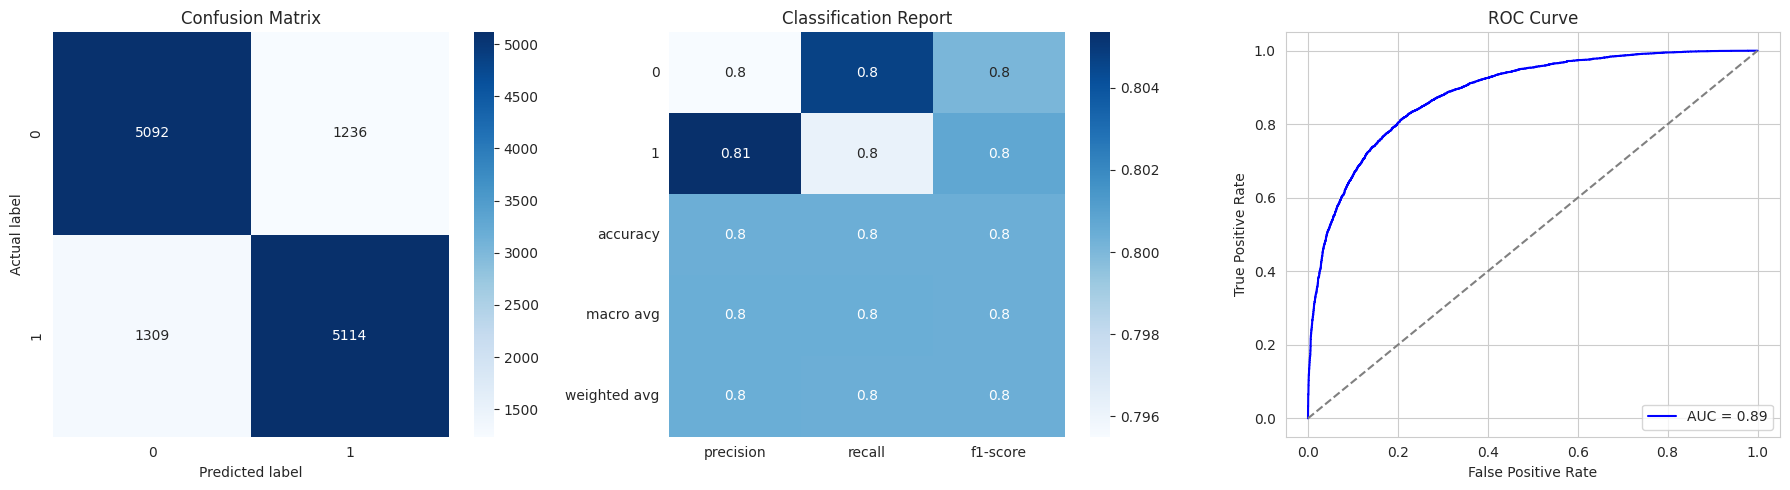

In [ ]:
for method in ensemble_model_dict:
    train_predict_evaluate_ensemble_cv(method)

## Neural Network model 🧠

In [ ]:
# Define ranges for epochs and batch sizes
epoch_options = [5, 10, 15]
batch_size_options = [16, 32, 64]

best_accuracy = 0
best_epoch = 0
best_batch_size = 0

for epoch in epoch_options:
    for batch_size in batch_size_options:
        # Define the neural network model
        model = Sequential()
        model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
        model.add(Dense(32, activation='relu'))  # Second hidden layer
        model.add(Dense(1, activation='sigmoid'))  # Output layer

        # Compile the model
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=batch_size, verbose=0)

        # Evaluate the model on the test data
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Update best scores
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = epoch
            best_batch_size = batch_size

        print(f'Epochs: {epoch}, Batch Size: {batch_size}, Test Accuracy: {accuracy:.4f}')

# Print out the best configuration
print(f'Best Test Accuracy: {best_accuracy:.4f} achieved with Epochs: {best_epoch} and Batch Size: {best_batch_size}')


Epochs: 5, Batch Size: 16, Test Accuracy: 0.7960
Epochs: 5, Batch Size: 32, Test Accuracy: 0.7948
Epochs: 5, Batch Size: 64, Test Accuracy: 0.7948
Epochs: 10, Batch Size: 16, Test Accuracy: 0.7978
Epochs: 10, Batch Size: 32, Test Accuracy: 0.7973
Epochs: 10, Batch Size: 64, Test Accuracy: 0.7952
Epochs: 15, Batch Size: 16, Test Accuracy: 0.7945
Epochs: 15, Batch Size: 32, Test Accuracy: 0.7997
Epochs: 15, Batch Size: 64, Test Accuracy: 0.7978
Best Test Accuracy: 0.7997 achieved with Epochs: 15 and Batch Size: 32
